# About the data

dataset 1: shipping identity in arctic

dataset 2: diving waters in alaskafornat geopackage .gpkg open , nonproprietary platform independent self describing format

dataset 3: polygon showing alaskas boundaries

In [2]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import rioxarray as rioxr
import geopandas as gpd
from rasterio.features import rasterize # for rasterizing polygons

In [3]:
pd.set_option("display.max.columns", None)

In [5]:
# import data
# https://arcticdata.io/metacat/d1/mn/v2/object/urn%3Auuid%3A0d223f34-77fc-4ebe-8a58-459b7e575668
raw_dist = rioxr.open_rasterio('https://arcticdata.io/metacat/d1/mn/v2/object/urn%3Auuid%3A0d223f34-77fc-4ebe-8a58-459b7e575668')
raw_dist

<xarray.DataArray (band: 1, y: 2308, x: 3087)>
[7124796 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -2.55e+06 -2.549e+06 ... 5.347e+05 5.357e+05
  * y            (y) float64 2.711e+06 2.71e+06 ... 4.053e+05 4.043e+05
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  2564975.75
    STATISTICS_MEAN:     nan
    STATISTICS_MINIMUM:  0
    STATISTICS_STDDEV:   nan
    _FillValue:          -3.4e+38
    scale_factor:        1.0
    add_offset:          0.0

In [12]:
# open fishing areas polygons
fishing_areas = gpd.read_file(os.path.join(os.path.join(os.getcwd(),'data','Alaska_Commercial_Salmon_Boundaries.gpkg')))

In [13]:
fishing_areas.head()

,OBJECTID,GEOMETRY_START_DATE,GEOMETRY_END_DATE,STAT_AREA,STAT_AREA_NAME,FISHERY_GROUP_CODE,GIS_SERIES_NAME,GIS_SERIES_CODE,REGION_CODE,REGISTRATION_AREA_NAME,REGISTRATION_AREA_CODE,REGISTRATION_AREA_ID,REGISTRATION_LOCATION_ABBR,MANAGEMENT_AREA_NAME,MANAGEMENT_AREA_CODE,DISTRICT_NAME,DISTRICT_CODE,DISTRICT_ID,SUBDISTRICT_NAME,SUBDISTRICT_CODE,SUBDISTRICT_ID,SECTION_NAME,SECTION_CODE,SECTION_ID,SUBSECTION_NAME,SUBSECTION_CODE,SUBSECTION_ID,COAR_AREA_CODE,CREATOR,CREATE_DATE,EDITOR,EDIT_DATE,COMMENTS,STAT_AREA_VERSION_ID,Shape_Length,Shape_Area,geometry
0,12,1975-01-01 00:00:00+00:00,NaT,33461,Tanana River mouth to Kantishna River,B,Salmon,B,3,Yukon Area,Y,None,None,Upper Yukon,YU,6 District,Y-6,None,6-A Subdistrict,6-A,None,,None,NaN,None,None,None,YU,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,"Yukon District, 6 Subdistrict and 6-A Section ...",None,4.610183,0.381977,"MULTIPOLYGON (((-151.32805 64.96913, -151.3150..."
1,13,1975-01-01 00:00:00+00:00,NaT,33462,Kantishna River to Wood River,B,Salmon,B,3,Yukon Area,Y,None,None,Upper Yukon,YU,6 District,Y-6,None,6-B Subdistrict,6-B,None,,None,NaN,None,None,None,YU,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,"Yukon District, 6 Subdistrict and 6-B Section ...",None,3.682421,0.321943,"MULTIPOLYGON (((-149.96255 64.70518, -149.9666..."
2,18,1978-01-01 00:00:00+00:00,NaT,33431,Toklik to Cottonwood Point,B,Salmon,B,3,Yukon Area,Y,None,None,Lower Yukon,YL,3 District,Y-3,None,,None,None,None,None,NaN,None,None,None,YL,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,Yukon District and 3 Subdistrict until 1/1/1980,None,2.215641,0.198740,"MULTIPOLYGON (((-161.39853 61.55463, -161.4171..."
3,19,1980-01-01 00:00:00+00:00,NaT,33442,"Right Bank, Bishop Rock to Illinois Creek",B,Salmon,B,3,Yukon Area,Y,None,None,Upper Yukon,YU,4 District,Y-4,None,4-B Subdistrict,4-B,None,None,None,NaN,None,None,None,YU,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,None,None,9.179852,0.382788,"MULTIPOLYGON (((-153.15234 65.24944, -153.0761..."
4,20,1980-01-01 00:00:00+00:00,NaT,33443,"Left Bank, Cone Point to Illinois Creek",B,Salmon,B,3,Yukon Area,Y,None,None,Upper Yukon,YU,4 District,Y-4,None,4-B Subdistrict,4-B,None,None,None,NaN,None,None,None,YU,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,None,None,9.500826,0.378262,"MULTIPOLYGON (((-152.99905 65.17027, -152.9897..."


In [14]:
# import alaska boundary
ak_bound = gpd.read_file(os.path.join(os.path.join(os.getcwd(),'data','alaska_perimeter','alaska_perimeter.shp')))

In [27]:
ak_bound.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4,9,02,01785533,02,AK,Alaska,00,G4000,A,1478943541175,245377731557,+63.3473560,-152.8397334,"MULTIPOLYGON (((-1728945.561 474182.534, -1728..."


In [28]:
ak_bound.crs

<Projected CRS: EPSG:3338>
Name: NAD83 / Alaska Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Alaska.
- bounds: (172.42, 51.3, -129.99, 71.4)
Coordinate Operation:
- name: Alaska Albers (meters)
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [19]:
# clean
# small caps
fishing_areas.columns = fishing_areas.columns.str.lower()
fishing_areas.head()

,objectid,geometry_start_date,geometry_end_date,stat_area,stat_area_name,fishery_group_code,gis_series_name,gis_series_code,region_code,registration_area_name,registration_area_code,registration_area_id,registration_location_abbr,management_area_name,management_area_code,district_name,district_code,district_id,subdistrict_name,subdistrict_code,subdistrict_id,section_name,section_code,section_id,subsection_name,subsection_code,subsection_id,coar_area_code,creator,create_date,editor,edit_date,comments,stat_area_version_id,shape_length,shape_area,geometry
0,12,1975-01-01 00:00:00+00:00,NaT,33461,Tanana River mouth to Kantishna River,B,Salmon,B,3,Yukon Area,Y,None,None,Upper Yukon,YU,6 District,Y-6,None,6-A Subdistrict,6-A,None,,None,NaN,None,None,None,YU,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,"Yukon District, 6 Subdistrict and 6-A Section ...",None,4.610183,0.381977,"MULTIPOLYGON (((-151.32805 64.96913, -151.3150..."
1,13,1975-01-01 00:00:00+00:00,NaT,33462,Kantishna River to Wood River,B,Salmon,B,3,Yukon Area,Y,None,None,Upper Yukon,YU,6 District,Y-6,None,6-B Subdistrict,6-B,None,,None,NaN,None,None,None,YU,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,"Yukon District, 6 Subdistrict and 6-B Section ...",None,3.682421,0.321943,"MULTIPOLYGON (((-149.96255 64.70518, -149.9666..."
2,18,1978-01-01 00:00:00+00:00,NaT,33431,Toklik to Cottonwood Point,B,Salmon,B,3,Yukon Area,Y,None,None,Lower Yukon,YL,3 District,Y-3,None,,None,None,None,None,NaN,None,None,None,YL,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,Yukon District and 3 Subdistrict until 1/1/1980,None,2.215641,0.198740,"MULTIPOLYGON (((-161.39853 61.55463, -161.4171..."
3,19,1980-01-01 00:00:00+00:00,NaT,33442,"Right Bank, Bishop Rock to Illinois Creek",B,Salmon,B,3,Yukon Area,Y,None,None,Upper Yukon,YU,4 District,Y-4,None,4-B Subdistrict,4-B,None,None,None,NaN,None,None,None,YU,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,None,None,9.179852,0.382788,"MULTIPOLYGON (((-153.15234 65.24944, -153.0761..."
4,20,1980-01-01 00:00:00+00:00,NaT,33443,"Left Bank, Cone Point to Illinois Creek",B,Salmon,B,3,Yukon Area,Y,None,None,Upper Yukon,YU,4 District,Y-4,None,4-B Subdistrict,4-B,None,None,None,NaN,None,None,None,YU,Evelyn Russel,2006-03-26 00:00:00+00:00,Sabrina Larsen,2017-02-02 00:00:00+00:00,None,None,9.500826,0.378262,"MULTIPOLYGON (((-152.99905 65.17027, -152.9897..."


In [24]:
# check crs
raw_dist.rio.crs

CRS.from_epsg(3338)

In [23]:
fishing_areas.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [29]:
# override crs
fishing_areas = fishing_areas.to_crs('epsg:3338')

# data selection
we'll be working with data from Kodak

In [30]:
# reg areas
print(fishing_areas.registration_area_name.unique())

['Yukon Area' 'Kuskokwim Area' 'Prince William Sound Area'
 'Bristol Bay Area' 'Chignik Area' 'Kodiak Area' 'Alaska Peninsula Area'
 'Cook Inlet Area' 'Norton Sound-Port Clarence Area'
 'Arctic-Kotzebue Area' 'Aleutian Islands Area' 'Atka-Amlia Islands Area'
 'Southeastern Alaska Area']


In [31]:
# select kodiak
kodiak = fishing_areas[fishing_areas.registration_area_name == 'Kodiak Area']
print(len(kodiak))

118


# plot kodiak fishing area

one way to add custom legend is to create a patch object for a geometry in our plot
We can use the mpatches we imported

syntax: 

great_patch = mpatches.Patch(color= great_color, label = great_label)

To add to legend, we should have created an axis ex by calling fig, ax = plt.subplots(), then we add in the patch by:

ax.legend(handles= [great patch])


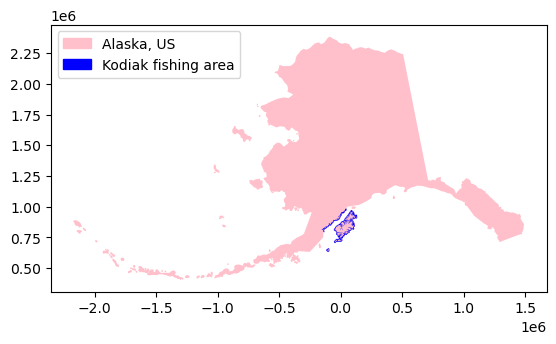

In [35]:
fig, ax= plt.subplots()

#----------------------------------
ak_bound.plot(ax=ax, color='pink')
ak_patch = mpatches.Patch(color='pink', label = 'Alaska, US')

#----------------------------------
kodiak.plot(ax=ax, color='blue')
kodiak_patch = mpatches.Patch(color='blue', label = 'Kodiak fishing area')

#----------------------------------
# create a legend
ax.legend(handles = [ak_patch, kodiak_patch], loc='upper left')

plt.show()

# Dissolve and explode polygons

Kodiak data is too granular for our purposes we want to get stats on distance traveled on each fishing district

In [37]:
# check number of districts and rows
len(kodiak)

118

In [38]:
len(kodiak.district_name.unique())

7

In [39]:
# 118 across 7 districts

We can aggregate the geometries based on the values of a column using the dissolve method "a geospatial groupby"

here we will dssolve by district name:

In [45]:
# as_index=False to not make district name the index
districts = kodiak[['geometry', 'district_name']].dissolve(by='district_name', as_index=False)
districts

,district_name,geometry
0,Afognak District,"POLYGON ((117320.445 935905.028, 117387.891 93..."
1,Alitak Bay District,"POLYGON ((-20734.052 769618.550, -20652.681 76..."
2,Eastside Kodiak District,"MULTIPOLYGON (((-100323.045 633409.206, -10041..."
3,Mainland District,"MULTIPOLYGON (((-134659.359 791834.058, -13771..."
4,Northeast Kodiak District,"POLYGON ((113349.628 855371.323, 113490.376 85..."
5,Northwest Kodiak District,"POLYGON ((7822.482 849511.733, 7817.541 849495..."
6,Southwest Kodiak District,"POLYGON ((-31173.650 786489.038, -31165.811 78..."


<AxesSubplot:>

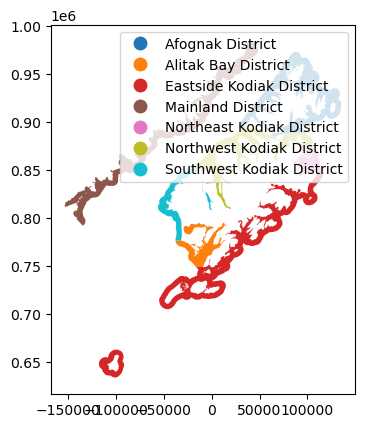

In [47]:
districts.plot(column='district_name', legend=True)

moving the legend using loc and bbox to anchor

loc: indicate the corner of the legend box we are aligning
bbox to anchor: tuple with coordinates of where to place the corner specified in loc. values between 0 and 1 are inside the plot 


<AxesSubplot:>

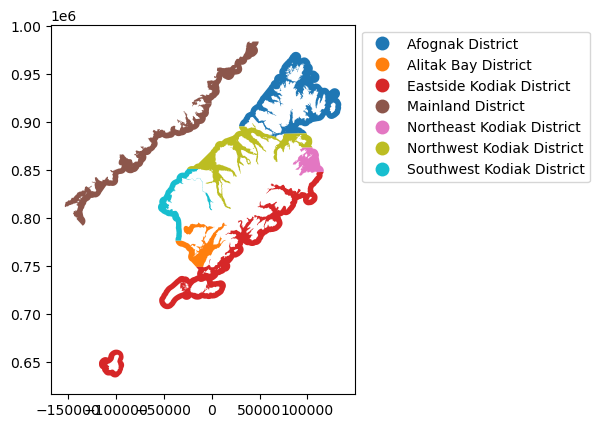

In [50]:
districts.plot(column='district_name', legend=True, legend_kwds = {'loc':'upper left', 'bbox_to_anchor': (1,1)})

# explode
notice some of our districts are multipolygons. to simplify our analysis we will separate each multiploygon into individual polygons

use explode from geopandas

In [51]:
districts.explode() # multi-index!

/tmp/ipykernel_3270607/2696959311.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  districts.explode()


district_name  \
0 0           Afognak District   
1 0        Alitak Bay District   
2 0   Eastside Kodiak District   
  1   Eastside Kodiak District   
3 0          Mainland District   
  1          Mainland District   
4 0  Northeast Kodiak District   
5 0  Northwest Kodiak District   
6 0  Southwest Kodiak District   

                                              geometry  
0 0  POLYGON ((117320.445 935905.028, 117387.891 93...  
1 0  POLYGON ((-20734.052 769618.550, -20652.681 76...  
2 0  POLYGON ((-100323.045 633409.206, -100419.680 ...  
  1  POLYGON ((-14244.415 714649.799, -14326.870 71...  
3 0  POLYGON ((-134659.359 791834.058, -137719.352 ...  
  1  POLYGON ((-13345.174 922271.590, -13358.061 92...  
4 0  POLYGON ((113349.628 855371.323, 113490.376 85...  
5 0  POLYGON ((7822.482 849511.733, 7817.541 849495...  
6 0  POLYGON ((-31173.650 786489.038, -31165.811 78...

In [54]:
districts = districts.explode(ignore_index=True) # ignore multi-index!
districts

,district_name,geometry
0,Afognak District,"POLYGON ((117320.445 935905.028, 117387.891 93..."
1,Alitak Bay District,"POLYGON ((-20734.052 769618.550, -20652.681 76..."
2,Eastside Kodiak District,"POLYGON ((-100323.045 633409.206, -100419.680 ..."
3,Eastside Kodiak District,"POLYGON ((-14244.415 714649.799, -14326.870 71..."
4,Mainland District,"POLYGON ((-134659.359 791834.058, -137719.352 ..."
5,Mainland District,"POLYGON ((-13345.174 922271.590, -13358.061 92..."
6,Northeast Kodiak District,"POLYGON ((113349.628 855371.323, 113490.376 85..."
7,Northwest Kodiak District,"POLYGON ((7822.482 849511.733, 7817.541 849495..."
8,Southwest Kodiak District,"POLYGON ((-31173.650 786489.038, -31165.811 78..."


# Distance raster prep

note we have a band with dimmension of length 1, need to squeeze

In [56]:
raw_dist = raw_dist.squeeze().drop('band')
raw_dist

<xarray.DataArray (y: 2308, x: 3087)>
[7124796 values with dtype=float32]
Coordinates:
  * x            (x) float64 -2.55e+06 -2.549e+06 ... 5.347e+05 5.357e+05
  * y            (y) float64 2.711e+06 2.71e+06 ... 4.053e+05 4.043e+05
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  2564975.75
    STATISTICS_MEAN:     nan
    STATISTICS_MINIMUM:  0
    STATISTICS_STDDEV:   nan
    _FillValue:          -3.4e+38
    scale_factor:        1.0
    add_offset:          0.0

In [59]:
print("After squeeze:\ndimmensions", {raw_dist.dims})

After squeeze:
dimmensions {('y', 'x')}


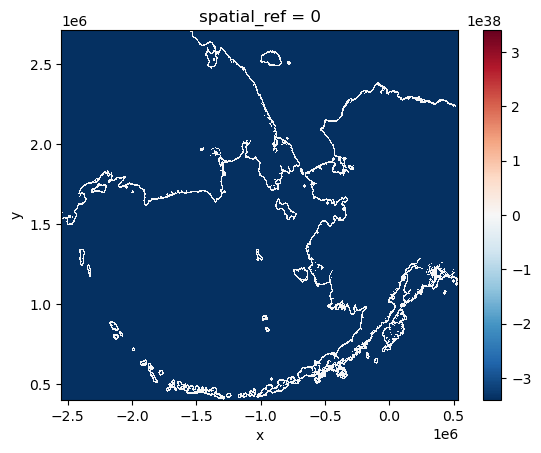

In [61]:
raw_dist.plot() # looks super weird, look at the scale and the shape, something is obscuring the rest of the data

In [66]:
# check min and max values
raw_dist.min().item() # so negative it is obscuring the rest of the values
#also wtf is a negative distance

-3.3999999521443642e+38

In [63]:
raw_dist.max().item()

2564975.75

In [68]:
nodata = raw_dist.rio.nodata
print(nodata)

-3.4e+38


In [69]:
#looks like our wacky value doesnt have data, lets cut it

In [70]:
# we can select all pixels where there is raster data using the where method
# by default, where() will replace np.nan aka nas at every cell that doesnt satisfy the condition

In [73]:
dist = raw_dist.where(raw_dist != nodata)

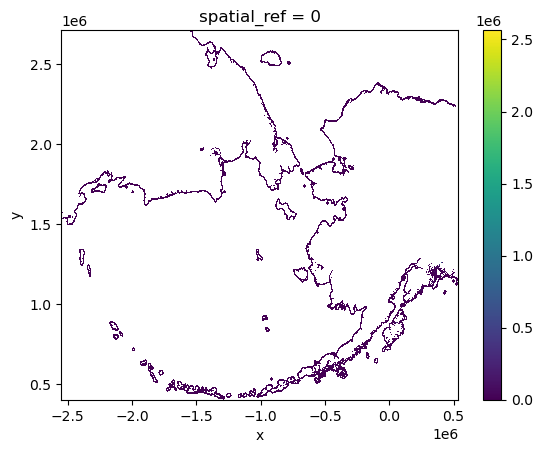

In [72]:
raw_dist.where(raw_dist != nodata).plot()

In [74]:
# clipping raster
kodiak_dist = dist.rio.clip_box(*districts.total_bounds)
kodiak_dist

<xarray.DataArray (y: 352, x: 289)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * x            (x) float64 -1.531e+05 -1.521e+05 ... 1.338e+05 1.348e+05
  * y            (y) float64 9.843e+05 9.833e+05 ... 6.343e+05 6.333e+05
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  2564975.75
    STATISTICS_MEAN:     nan
    STATISTICS_MINIMUM:  0
    STATISTICS_STDDEV:   nan
    scale_factor:        1.0
    add_offset:          0.0
    _FillValue:          -3.4e+38

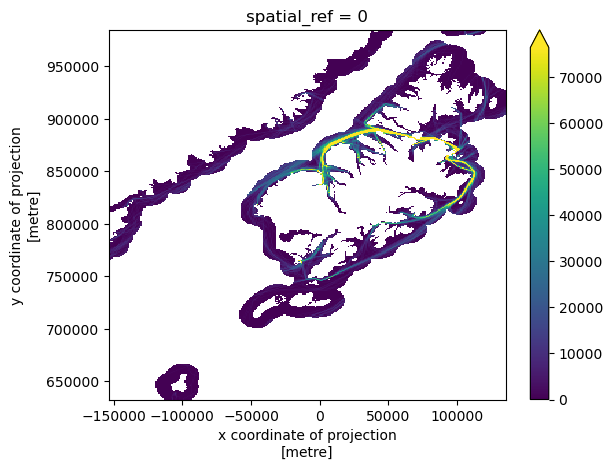

In [77]:
kodiak_dist.plot(robust = True) # robust only plots the 2nd percentile to 98% percentile